In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [8]:
def enumerate_subgraphs(G,depth):
    
    def first_set(G):
        indexed_subgraphs = []
        extensions = []
        for node in G.nodes:
            indexed_subgraphs.append([[node],node])
        for indexed_subgraph in indexed_subgraphs:
            extensions.append(get_extension(indexed_subgraph,G))
        return indexed_subgraphs, extensions
    
    def get_extension(indexed_subgraph,G):
        extension = []
        for G_node in G.nodes:
            for subgraph_node in indexed_subgraph[0]:
                if (G_node,subgraph_node) in G.edges and G_node>indexed_subgraph[1]:
                    extension.append(G_node)
        return list(set(extension) - set(indexed_subgraph[0]))
    
    def extend_subgraph(indexed_subgraph, extension):
        extended_subgraphs = []
        subgraph = indexed_subgraph[0]
        v0 = indexed_subgraph[1]
        for node in extension:
            extended_subgraph = subgraph.copy()
            extended_subgraph.append(node)
            extended_subgraphs.append([extended_subgraph,v0])
        return extended_subgraphs
    
    def to_be_computed(indexed_subgraph, extension, depth):
        if len(indexed_subgraph[0])<depth and extension!=[]:
            return True
        else:
            return False
    
    indexed_subgraphs, extensions = first_set(G)
    all_subgraphs = indexed_subgraphs.copy()
    while True:
        parent_set = []
        for subgraph_extension_pair in zip(indexed_subgraphs,extensions):
            if to_be_computed(subgraph_extension_pair[0],subgraph_extension_pair[1],depth):
                parent_set.append(subgraph_extension_pair)
        if parent_set == []:
            break
        indexed_subgraphs = []
        for parent in parent_set:
            indexed_subgraphs+=extend_subgraph(*parent)
        all_subgraphs+=indexed_subgraphs
        extensions = []
        for subgraph in indexed_subgraphs:
            extensions.append(get_extension(subgraph,G))
    return all_subgraphs

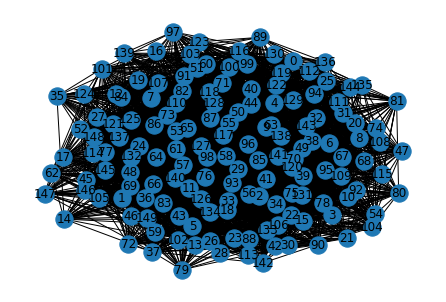

In [50]:
G = nx.erdos_renyi_graph(150,0.3)
nx.draw(G, with_labels=True)

In [52]:
sub = enumerate_subgraphs(G,3)

In [53]:
%%time
sub3 = [graph[0] for graph in sub if len(graph[0])==3]

CPU times: user 25.8 ms, sys: 0 ns, total: 25.8 ms
Wall time: 24.7 ms


In [54]:
%%time
k=sub3
k.sort()
independent_subgraphs = list(k for k,_ in itertools.groupby(k))

CPU times: user 61.9 ms, sys: 6.67 ms, total: 68.6 ms
Wall time: 66.2 ms


In [55]:
induced = [nx.induced_subgraph(G,nodeset) for nodeset in independent_subgraphs]

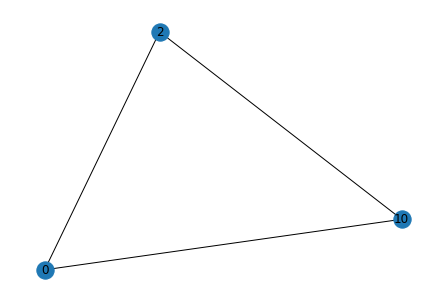

In [61]:
nx.draw(induced[4],with_labels=True)

In [56]:
len(induced)

167535